In [4]:
import pandas as pd
import json 
import os 
import sys
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

path = '../data/llama2_7b'

In [6]:
res = []
with open(os.path.join(path, 'gcg_run_llama_guard.json')) as f:
    for line in f:
        res.append(json.loads(line))

monitor_losses = []
gcg_losses = []
for r in res:
    monitor_losses.append(r['monitor_losses'])
    gcg_losses.append(r['gcg_losses'])

monitor_losses = np.array(monitor_losses)
gcg_losses = np.array(gcg_losses)

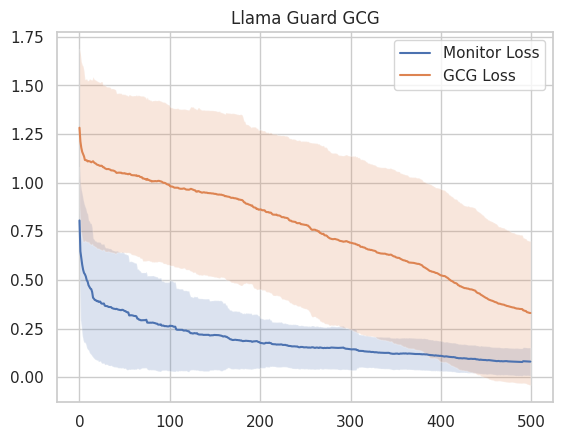

In [10]:
sns.set(style='whitegrid')
plt.plot(monitor_losses.mean(axis=0), label='Monitor Loss')
plt.plot(gcg_losses.mean(axis=0), label='GCG Loss')
plt.fill_between(range(500), monitor_losses.mean(axis=0) - monitor_losses.std(axis=0), monitor_losses.mean(axis=0) + monitor_losses.std(axis=0), alpha=0.2)
plt.fill_between(range(500), gcg_losses.mean(axis=0) - gcg_losses.std(axis=0), gcg_losses.mean(axis=0) + gcg_losses.std(axis=0), alpha=0.2)
plt.legend()
plt.title('Llama Guard GCG')
plt.show()